Мутация — это изменение небольшого участка нуклеотидной последовательности генома (ДНК).
Многие мутации представляют собой точечные мутации, при которых один нуклеотид в ДНК заменяется другим,(вставка и/или репликацию одного или нескольких нуклеотидов в молекуле ДНК).
Мутации вызываются ошибками в репликации ДНК последовательности или неблагоприятным воздействием внешних факторов (мутагенов),таких как химические вещества и радиация, алкоголь, наркотики, вирусы и бактерии, которые реагируют с ДНК и изменяют структуру отдельных нуклеотидов в ней.

Ваша задача состоит в том, чтобы предсказать вероятность мутации последовательности генома ДНК при определенных условиях окружающей среды.
Последовательность генома, разделенна на 9 подпоследовательностей нуклеотидов в датасете.

Ваша задача во время работы:
1. Определить тип задачи
2. Отложить 15% данных с тренировочной выборки для валидации.
2. Определить тип переменных в датасете.
3. Если это необходимо провести препроцессинг данных, нужно ли применять алгоритмы понижения размерности? Нужно ли убирать аномалии?
4. Провести EDA и вывести какие-то умозаключения и посмотреть на распределения признаков, на корреляции, на выбросы.
5. Подумать над вариантом модели для того чтобы решить задачу (либо ансамблем моделей)
6. Подумать нужно ли применять Unsupervised learning подход для решения задачи? Неоходима ли дополнительная информация?
7. Обучить модель и вывести валидационный скор по метрике качества.
8. Построить отчет на 10 предложнений.

21

In [106]:
#   библиотеки, чтение датасета, отображение всех колонок
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('./train.csv')
#df_test = pd.read_csv('./Downloads/dna/1_variant_dna_sequence_mutation_prediction/input/test.csv')

#df.drop(columns=df.loc[:,'sequence1':'sequence9'].columns.to_list(), inplace=True)
#df.drop(columns = ['ID'], inplace=True)
df.sample(5)

,ID,sequence1,sequence2,sequence3,sequence4,sequence5,sequence6,sequence7,sequence8,sequence9,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,mutation
137120,228755,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,GATCGTAGCTAA,AAATCAGCTAAA,ATTCCATATTTT,ATTCCATATTTT,AAATCAGCTAAA,8,2,0,5,33,0,46,40,0,147,0.311706,0.420641,0.449877,0.283757,0.302376,0.735414,0.484307,0.310977,0.334130,0.307932,0.414867,0
85844,143392,GATCGTAGCTAA,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,AAATCAGCTAAA,ATTCCATATTTT,ATTCCATATTTT,AAATCAGCTAAA,5,0,0,4,33,0,19,23,0,69,0.501684,0.326492,0.250108,0.363097,0.344132,0.487366,0.518681,0.396057,0.368933,0.320052,0.510138,0
20853,34943,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,AAATCAGCTAAA,AAATCAGCTAAA,ATTCCATATTTT,AAATCAGCTAAA,6,6,1,4,15,6,49,4,0,100,0.333358,0.601362,0.237590,0.283388,0.789020,0.736080,0.627405,0.432353,0.185398,0.281874,0.336501,0
82005,137043,ATGCGCTTAATT,GATCGTAGCTAA,ATGCGCTTAATT,GATCGTAGCTAA,GATCGTAGCTAA,ATTCCATATTTT,AAATCAGCTAAA,AAATCAGCTAAA,ATTCCATATTTT,7,5,0,4,33,6,30,38,0,47,0.356217,0.240154,0.291779,0.308310,0.796974,0.281315,0.716017,0.250445,0.294777,0.257190,0.303197,1
120301,200933,GATCGTAGCTAA,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,AAATCAGCTAAA,ATTCCATATTTT,TAACATACAGAG,AAATCAGCTAAA,8,2,1,4,33,0,1,38,0,54,0.345566,0.315172,0.248570,0.594039,0.787292,0.488578,0.562617,0.340849,0.372932,0.333462,0.330585,0


# EDA

In [107]:
df.shape

(180000, 32)

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,180000.0,150259.572350,86591.625009,0.000000,75313.750000,150321.000000,225293.250000,299999.000000
A,180000.0,8.118989,3.078097,0.000000,7.000000,8.000000,10.000000,14.000000
B,180000.0,2.632989,4.147355,0.000000,0.000000,0.000000,3.000000,18.000000
C,180000.0,0.617833,1.191218,0.000000,0.000000,0.000000,1.000000,12.000000
D,180000.0,4.802733,1.514448,0.000000,4.000000,4.000000,5.000000,19.000000
E,180000.0,29.696178,12.700896,0.000000,33.000000,33.000000,33.000000,83.000000
F,180000.0,1.262467,2.109440,0.000000,0.000000,0.000000,2.000000,15.000000
G,180000.0,23.543444,13.897618,0.000000,9.000000,23.000000,35.000000,50.000000
H,180000.0,33.423717,18.991241,0.000000,19.000000,38.000000,49.000000,60.000000
I,180000.0,1.605150,2.752459,0.000000,0.000000,0.000000,2.000000,18.000000


## Visualization

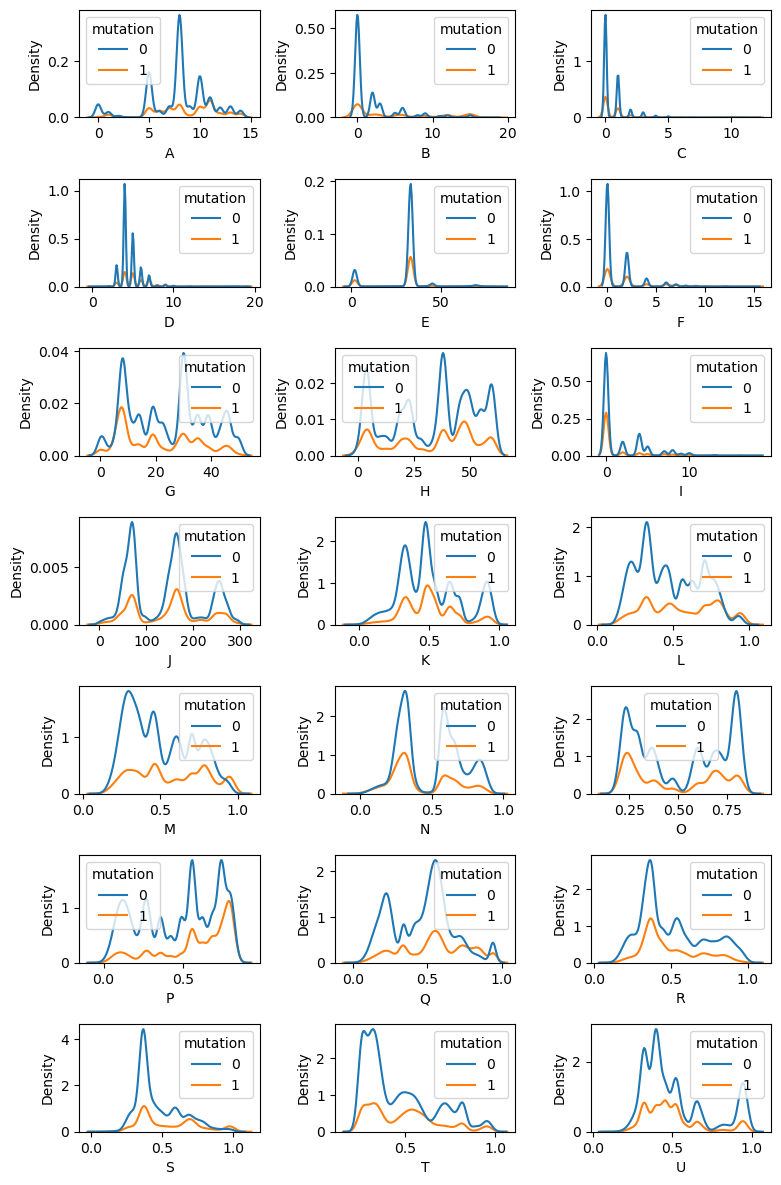

In [109]:
rows, cols, n = 7, 3, 1

fig = plt.figure(figsize = (8,12))
for i in list(df.loc[:,'A':'U'].columns.to_list()):
    plt.subplot(rows, cols, n)
    plt.xlabel(i)
    sns.kdeplot(x = df[i], hue = df['mutation'])
    n += 1

plt.show()

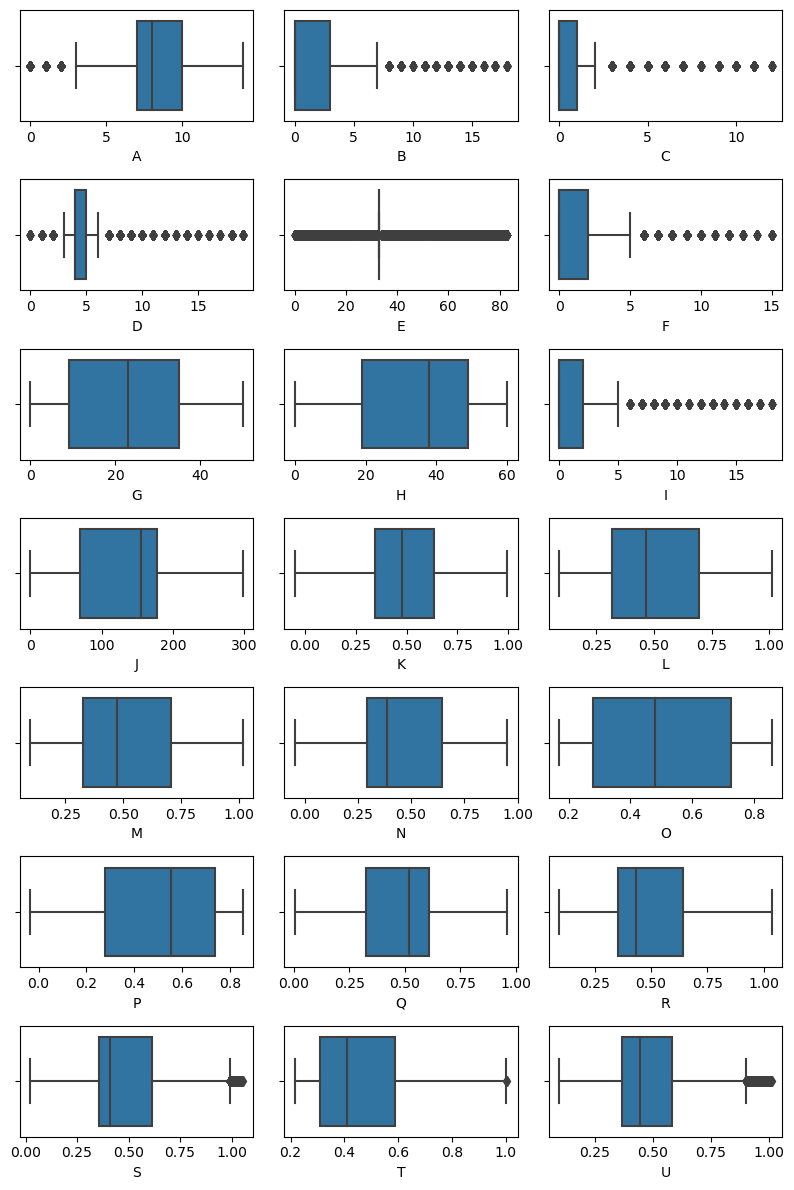

In [103]:
rows, cols, n = 7, 3, 1

fig = plt.figure(figsize = (8,12))
for i in list(df.loc[:,'A':'U'].columns.to_list()):
    plt.subplot(rows, cols, n)
    plt.xlabel(i)
    sns.boxplot(x = df[i])
    n += 1

plt.show()

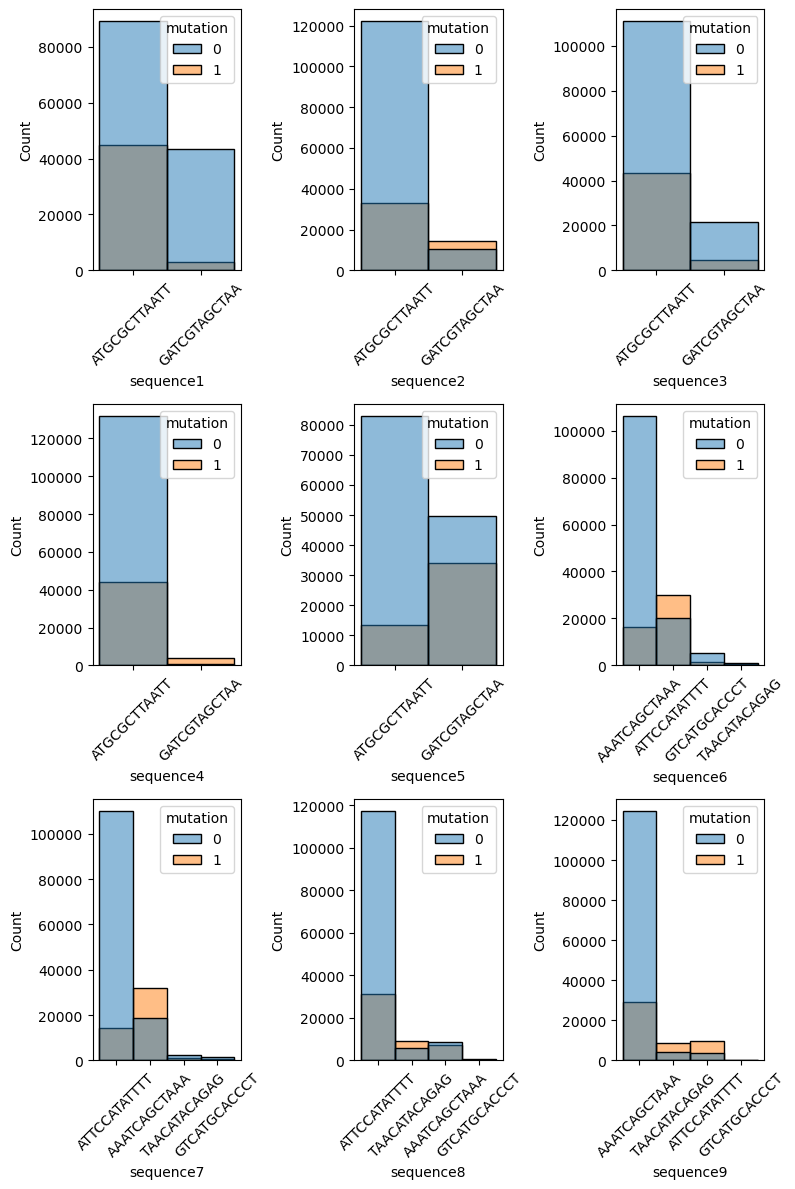

In [101]:
rows, cols, n = 3, 3, 1

fig = plt.figure(figsize = (8,12))
for i in list(df.loc[:,'sequence1':'sequence9'].columns.to_list()):
    plt.subplot(rows, cols, n)
    plt.xlabel(i)
    plt.xticks(rotation=45)
    sns.histplot(x = df[i], hue = df['mutation'])
    n += 1

plt.show()

# Preprocessing

## Deleting columns

In [110]:
#   Избавимся от колонок с нуклеотидами, так как они по сути отражают результат мутации 
#   под воздействием внешних факторов ('A':'U')

df.drop(columns=df.loc[:,'sequence1':'sequence9'].columns.to_list(), inplace=True)
df.drop(columns = ['ID'], inplace=True)

Так как последовательность нуклеотидов в датасете по сути есть результат воздействия внешних факторов, то можно удалить их из датасета.

## Scaling & Labeling

In [111]:
#    Отшкалируем наш датасет через StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:, 'A':'U'] = scaler.fit_transform(df.loc[:, 'A':'U'])
df.sample(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,mutation
164772,-0.038657,-0.634862,-0.518658,0.130257,0.260126,0.349636,-1.118428,0.609561,0.143454,0.295823,-0.155697,2.075609,2.037358,-0.913728,-0.204866,0.485033,1.628354,-0.672435,2.262267,-0.772275,0.054704,0
22527,0.935974,0.088493,0.320821,0.790565,0.260126,-0.598486,0.536536,0.820185,-0.583171,1.563496,1.660710,1.236418,1.012265,2.010701,1.390069,0.220090,-0.921409,1.966902,1.063811,2.172592,2.206643,1
154111,-1.013288,0.088493,-0.518658,-0.530051,-2.180654,-0.598486,-1.118428,0.662217,-0.583171,0.445763,0.571599,-1.287961,-0.189249,-0.537478,-1.261428,-0.604170,-1.695097,-0.034510,-0.588430,-0.624288,0.632808,0
142806,0.611097,-0.634862,0.320821,1.450873,0.260126,-0.598486,1.112176,-1.496679,0.870079,1.849744,0.382249,1.333973,1.312411,-0.843434,0.511755,-1.340680,-1.341762,0.040798,1.787651,0.242646,0.343208,0
61151,-0.038657,0.811848,0.320821,-1.190360,-2.180654,0.349636,-0.398878,1.346745,-0.583171,-1.067265,0.862263,-0.710314,-1.007591,-0.756698,1.393320,-0.338827,-0.752584,-0.466634,-0.772498,0.808973,-0.150425,1


## Split to Train&Test

In [112]:
#   Делим датасет 80/20 для трейна и теста

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'mutation'], df['mutation'], test_size=0.2)

# Class Balancing

In [113]:
#    Уменьшим датасет до соотношения классов 1:1

from imblearn.under_sampling import NearMiss

nr = NearMiss()

print('Shape before:\n', X_train.shape, y_train.shape)
print('Distribution of classes:\n', pd.DataFrame(y_train).value_counts(normalize=True))

X_train, y_train = nr.fit_resample(X_train, y_train.ravel())
print('Shape after:\n', X_train.shape, y_train.shape)

print('Distribution of classes:\n', pd.DataFrame(y_train).value_counts(normalize=True))

Shape before:
 (144000, 21) (144000,)
Distribution of classes:
 mutation
0           0.734187
1           0.265813
dtype: float64
Shape after:
 (76554, 21) (76554,)
Distribution of classes:
 0    0.5
1    0.5
dtype: float64


# Fit & Results

In [131]:
#   Будем использовать XGBClassifier:
#   - можно использовать GPU (прирост скорости в моей случае x20)
#   - благодаря GPU можно активнее подбирать гиперпараметры
#   - забегая вперед, остальные алгоритмы дают не такие хорошие метрики

from xgboost import XGBClassifier

model = XGBClassifier(
    #   ускоряемся на GPU
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    gpu_id = 0,
    
    #   гиперпараметры  
    subsample = 0.7, 
    num_class = 2, 
    n_estimators = 750, 
    max_depth = 6, 
    learning_rate = 0.2, 
    colsample_bytree = 0.5, 
    colsample_bylevel = 0.8,
    objective="multi:softmax"
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=750, n_jobs=None, num_class=2,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [132]:
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.6016944444444444
Precision: 0.3791515626530812
Recall: 0.8229665071770335
F1: 0.5191320969851437


In [ ]:
Предполагаю, что в данной задаче нужно сделать упор именно на метрику Recall - для максимальной полноты обнаружений мутаций.

# Upload model & results

In [133]:
X_test_csv = pd.read_csv('./test.csv')
X_test_csv.drop(columns=X_test_csv.loc[:,'sequence1':'sequence9'].columns.to_list(), inplace=True)
X_test_csv.drop(columns = ['ID'], inplace=True)
X_test_csv.loc[:, 'A':'U'] = scaler.fit_transform(X_test_csv.loc[:, 'A':'U'])
y_pred_csv = model.predict(X_test_csv)
pd.DataFrame(y_pred_csv).value_counts(normalize=True)

1    0.653675
0    0.346325
dtype: float64

In [134]:
import pickle

with open('dna_xgboost.pkl','wb') as f:
    pickle.dump(model, f)

In [135]:
pd.DataFrame(y_pred_csv).to_csv('predict.csv')

# Сonclusion

В датасете 9 признаков с последовательностями нуклеотидов и 21 признак с внешними факторами.
Признаки нуклеотидов удалены, так как они являются результатом воздействия внешних факторов. Вполне возможно, что признаки нуклеотидов можно было бы использовать для обучения модели, но в постановке задаче необходимо "предсказать вероятность мутации последовательности генома ДНК при определенных условиях окружающей среды".

В процессе разведовательного анализа не до конца было ясно, можно ли удалять выбросы, так как эти значения могут помочь в детекции мутаций.
Поэтому было принято решение выбросы не удалять.

Признаки с внешними факторами обработал с помощью StandardScaler.
Обучающую выборку сформировал с равными соотошением классов.
Обучение проводил через XGBoost и получил следующие метрики:

- Accuracy: 0.6016944444444444
- Precision: 0.3791515626530812
- Recall: 0.8229665071770335
- F1: 0.5191320969851437

Также использовал следующие алгоритмы с разными препроцессингами, пробовал использовать последовательность нуклеотидов в качестве признаков для обучения, обработанные через LabelEncoder:

LogisticRegression:
- Accuracy: 0.7739166666666667
- Precision: 0.5510594354777021
- Recall: 0.7603968756597003
- F1: 0.6390207122898833

KNN:
- Accuracy: 0.81
- Precision: 0.6882793017456359
- Recall: 0.5598377281947262
- F1: 0.6174496644295302

AdaBoost:
- Accuracy: 0.8451111111111111
- Precision: 0.7584785210799309
- Recall: 0.6026630032759167
- F1: 0.6716523377694029

SVM:
- Accuracy: 0.8222222222222222
- Precision: 0.7478510028653295
- Recall: 0.5294117647058824
- F1: 0.6199524940617577

Random Forest:
- Accuracy: 0.8398611111111111
- Precision: 0.764505119453925
- Recall: 0.5809128630705395
- F1: 0.6601827291482465

В принципе, неплохо себя еще показал Random Forest, при должном подборе гиперпараметров думаю можно было бы получить результаты по Recall не хуже XGBoost.
Я добивался высокого **Recall**, так как думаю, что данная метрика важна, когда мы ищем отклонения в геноме.